#Importing libraries

In [82]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [84]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#Reading the Prediction CSVs for Validation data by different models

In [86]:
Linear_Reg = pd.read_csv("/content/drive/MyDrive/Data Dreamers DSCI 554/Model Test Output/Linear_Regression_Predicted_2010_2020.csv") 
Linear_Reg.head()

,Unnamed: 0,Country,Time,Actual_Net_Migration,Predicted_Net_Migration
0,10750,Afghanistan,2010,-141.355,-141.332114
1,10751,Afghanistan,2011,418.796,418.793108
2,10752,Afghanistan,2012,105.905,105.908981
3,10753,Afghanistan,2013,48.076,48.070929
4,10754,Afghanistan,2014,255.611,255.608419


In [87]:
Ridge_Reg = pd.read_csv("/content/drive/MyDrive/Data Dreamers DSCI 554/Model Test Output/Ridge_Regression_Predicted_2010_2020.csv") 
Ridge_Reg.head()

,Unnamed: 0,Country,Time,Actual_Net_Migration,Predicted_Net_Migration
0,10750,Afghanistan,2010,-141.355,-141.331838
1,10751,Afghanistan,2011,418.796,418.793049
2,10752,Afghanistan,2012,105.905,105.909088
3,10753,Afghanistan,2013,48.076,48.071075
4,10754,Afghanistan,2014,255.611,255.608857


In [88]:
Lasso_Reg = pd.read_csv("/content/drive/MyDrive/Data Dreamers DSCI 554/Model Test Output/Lasso_Regression_Predicted_2010_2020.csv") 
Lasso_Reg.head()

,Unnamed: 0,Country,Time,Actual_Net_Migration,Predicted_Net_Migration
0,10750,Afghanistan,2010,-141.355,-140.041600
1,10751,Afghanistan,2011,418.796,416.064561
2,10752,Afghanistan,2012,105.905,105.450209
3,10753,Afghanistan,2013,48.076,48.039749
4,10754,Afghanistan,2014,255.611,254.081769


In [89]:
RF_Reg = pd.read_csv("/content/drive/MyDrive/Data Dreamers DSCI 554/Model Test Output/Random_Forest_Predicted_2010_2020.csv") 
RF_Reg.head()

,Unnamed: 0,Country,Time,Actual_Net_Migration,Predicted_Net_Migration
0,0,Afghanistan,1960,2.606,-11.104308
1,1,Afghanistan,1961,6.109,-11.104308
2,2,Afghanistan,1962,7.016,-11.104308
3,3,Afghanistan,1963,6.681,-8.376197
4,4,Afghanistan,1964,7.079,-8.376197


In [90]:
SVM = pd.read_csv("/content/drive/MyDrive/Data Dreamers DSCI 554/Model Test Output/SVR_Linear_Predicted_2010_2020.csv") 
SVM.head()

,Unnamed: 0,Country,Time,Actual_Net_Migration,Predicted_Net_Migration
0,0,Afghanistan,1960,2.606,-4182.921246
1,1,Afghanistan,1961,6.109,-4255.922750
2,2,Afghanistan,1962,7.016,-4338.597142
3,3,Afghanistan,1963,6.681,-4427.986053
4,4,Afghanistan,1964,7.079,-4520.648743


In [91]:
evaluation = pd.DataFrame()
evaluation['Time'] = Linear_Reg['Time']
evaluation['UN Data'] = Linear_Reg['Actual_Net_Migration']
evaluation['Linear Pred'] = Linear_Reg['Predicted_Net_Migration']
evaluation['Ridge Pred'] = Ridge_Reg['Predicted_Net_Migration']
evaluation['Lasso Pred'] = Lasso_Reg['Predicted_Net_Migration']
evaluation['Random Forest Pred'] = RF_Reg['Predicted_Net_Migration']
evaluation['SVM Pred'] = SVM['Predicted_Net_Migration']



In [92]:
evaluation.head()

,Time,UN Data,Linear Pred,Ridge Pred,Lasso Pred,Random Forest Pred,SVM Pred
0,2010,-141.355,-141.332114,-141.331838,-140.041600,-11.104308,-4182.921246
1,2011,418.796,418.793108,418.793049,416.064561,-11.104308,-4255.922750
2,2012,105.905,105.908981,105.909088,105.450209,-11.104308,-4338.597142
3,2013,48.076,48.070929,48.071075,48.039749,-8.376197,-4427.986053
4,2014,255.611,255.608419,255.608857,254.081769,-8.376197,-4520.648743


#Plotting Prediction Patterns

Since the scale of Predicted Net Migration for Linear, Lasso & Ridge Regressor is very different from Random Forest Regressor & SVM. We are using three plots to plot the prediction results for the ease of undestanding the difference in the results.

1. Plot1 - UN predicted data, Linear regressor predicted data, Lasso regressor predicted data, Ridge regressor predicted data
2. Plot2 - UN predicted data, Random Forest predicted data
3. Plot3 -UN predicted data, SVM predicted data

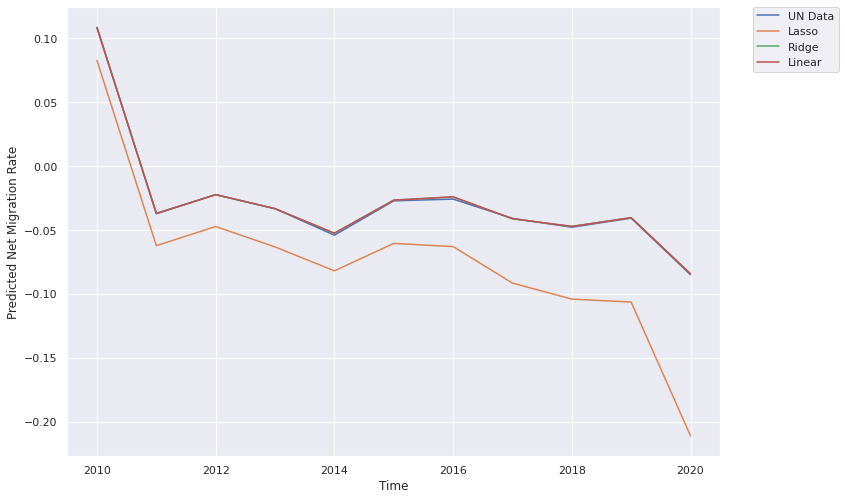

In [115]:
import seaborn as sns
sns.lineplot(x="Time", y="UN Data", data=evaluation, label = "UN Data", ci = None)
sns.lineplot(x="Time", y="Lasso Pred", data=evaluation, label = "Lasso", ci = None)
sns.lineplot(x="Time", y="Ridge Pred", data=evaluation, label = "Ridge", ci = None)
sns.lineplot(x="Time", y="Linear Pred", data=evaluation, label = "Linear", ci = None)

#sns.lineplot(x="Time", y="Random Forest Pred", data=evaluation, label = "E",  ci = None)
#sns.lineplot(x="Time", y="SVM Pred", data=evaluation, label = "F", ci = None)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# set label
plt.ylabel("Predicted Net Migration Rate")

plt.show()

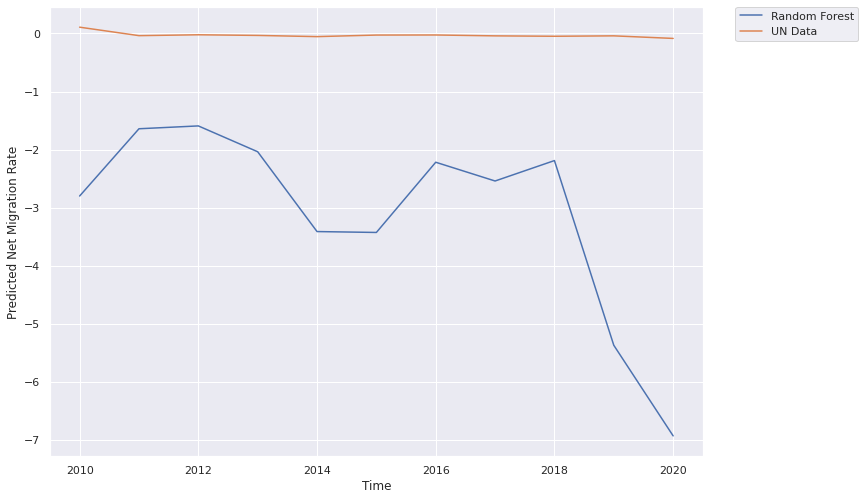

In [114]:
sns.lineplot(x="Time", y="Random Forest Pred", data=evaluation, label = "Random Forest",  ci = None)
#sns.lineplot(x="Time", y="SVM Pred", data=evaluation, label = "SVM Pred", ci = None)
sns.lineplot(x="Time", y="UN Data", data=evaluation, label = "UN Data", ci = None)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# set label
plt.ylabel("Predicted Net Migration Rate")

plt.show()

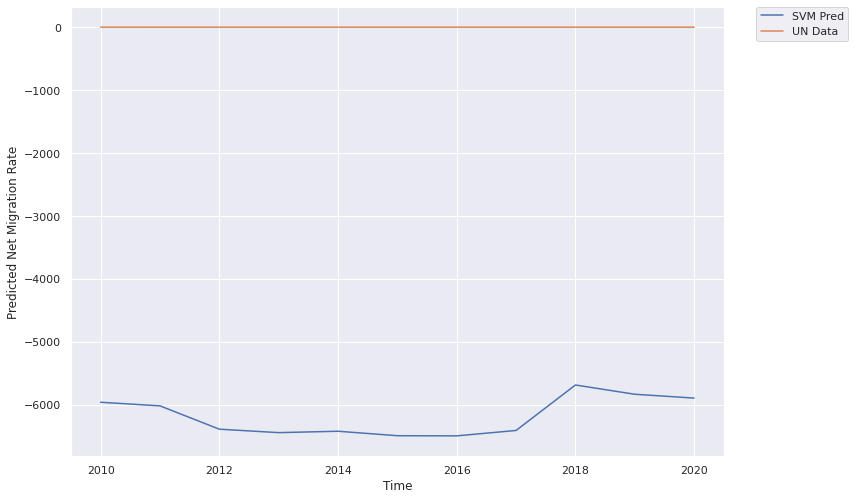

In [113]:
#sns.lineplot(x="Time", y="Random Forest Pred", data=evaluation, label = "Random Forest",  ci = None)
sns.lineplot(x="Time", y="SVM Pred", data=evaluation, label = "SVM Pred", ci = None)
sns.lineplot(x="Time", y="UN Data", data=evaluation, label = "UN Data", ci = None)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# set label
plt.ylabel("Predicted Net Migration Rate")

plt.show()

#Testing

In [102]:
#Loading the test set generated in Model Training Notebook
test_set = pd.read_csv("/content/drive/MyDrive/Data Dreamers DSCI 554/Model Test Output/test_dataset.csv")
test_set = test_set.drop(['Unnamed: 0'], axis = 1)

In [ ]:
#Loading the country location generated in Model Training Notebook
test_location = pd.read_csv("/content/drive/MyDrive/Data Dreamers DSCI 554/Model Test Output/test_location.csv")
test_location.head()

In [103]:
#Separating the dependent & independent variables
Xtest = test_set.drop('NetMigrations', axis = 1)
Ytest = test_set['NetMigrations']

In [100]:
#Loading the trained final linear regressor Model
import pickle
final_model = pickle.load(open('/content/drive/MyDrive/Data Dreamers DSCI 554/Model Test Output/linear_reg_model.pkl', 'rb'))

In [104]:
#Final testing on the best model i.e Linear Regression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

migration_predictions = final_model.predict(Xtest)                                     #Testing with the best model
lin_mse = mean_squared_error(migration_predictions,Ytest)
lin_rmse = np.sqrt(lin_mse)
lin_mae = mean_absolute_error(migration_predictions,Ytest)
print("RMSE for Linear regression =",lin_rmse)
print("MAE for Linear Regression(Test set) =",lin_mae)

RMSE for Linear regression = 0.006144021686561076
MAE for Linear Regression(Test set) = 0.004866111764655888


In [105]:
Xtest['Actual_Net_Migration'] = Ytest

In [106]:
Xtest['Predicted_Net_Migration'] =migration_predictions

In [109]:
Xtest['Country'] = test_location['Location']

In [110]:
Xtest.head()

,Location,Time,PopDensity,PopSexRatio,MedianAgePop,NatChange,PopChange,PopGrowthRate,DoublingTime,Births,Births1519,CBR,TFR,SRB,Deaths,DeathsMale,DeathsFemale,CDR,LEx,LExMale,LExFemale,LE15,LE15Male,LE15Female,LE65,LE65Male,LE65Female,LE80,LE80Male,LE80Female,InfantDeaths,IMR,Under5Deaths,Actual_Net_Migration,Predicted_Net_Migration,Country
0,0,2021,61.7584,102.0675,16.7338,1145.705,962.056,2.399,28.8932,1440.941,189.465,35.842,4.6434,105.2,295.236,168.877,126.359,7.344,61.9824,58.9147,65.2791,51.3548,48.3252,54.5893,11.8877,10.9998,12.6539,4.9991,4.6188,5.2924,64.117,44.6869,82.156,-183.672,-183.650559,Afghanistan
1,0,2022,63.3436,101.9846,16.8702,1162.402,1096.562,2.666,25.9995,1446.699,186.575,35.143,4.5235,105.2,284.297,163.410,120.887,6.906,62.8792,59.7659,66.2132,51.9011,48.8882,55.1015,11.9838,11.0755,12.7590,5.0317,4.6406,5.3248,58.957,40.8024,75.592,-65.846,-65.841514,Afghanistan
2,0,2023,65.0549,101.9098,17.0337,1191.451,1125.604,2.665,26.0093,1459.505,184.021,34.521,4.4069,105.1,268.054,153.790,114.264,6.340,64.2310,61.2024,67.4368,53.0087,50.1087,56.0500,12.4583,11.5473,13.2222,5.2419,4.8634,5.5167,55.002,37.7463,70.611,-65.846,-65.848500,Afghanistan
3,0,2024,66.8000,101.8474,17.2113,1206.440,1140.587,2.630,26.3554,1468.735,180.881,33.834,4.2878,105.1,262.295,150.388,111.907,6.042,65.0545,62.0661,68.1945,53.8071,50.9720,56.7549,12.9035,12.0031,13.6462,5.4456,5.0913,5.6952,54.452,37.1082,70.015,-65.846,-65.854504,Afghanistan
4,0,2025,68.5601,101.7885,17.4069,1210.939,1145.101,2.572,26.9497,1477.664,177.835,33.168,4.1769,105.1,266.725,153.024,113.701,5.987,65.3510,62.3567,68.4890,54.2855,51.4669,57.2051,13.2974,12.4151,14.0157,5.6325,5.3094,5.8541,57.128,38.6857,73.585,-65.846,-65.839516,Afghanistan


In [111]:
Prediction_Output = Xtest[['Country','Time','Actual_Net_Migration','Predicted_Net_Migration']]
Prediction_Output

,Country,Time,Actual_Net_Migration,Predicted_Net_Migration
0,Afghanistan,2021,-183.672,-183.650559
1,Afghanistan,2022,-65.846,-65.841514
2,Afghanistan,2023,-65.846,-65.848500
3,Afghanistan,2024,-65.846,-65.854504
4,Afghanistan,2025,-65.846,-65.839516
...,...,...,...,...
6445,Zimbabwe,2046,-9.999,-9.996565
6446,Zimbabwe,2047,-9.999,-10.003030
6447,Zimbabwe,2048,-9.999,-10.001576
6448,Zimbabwe,2049,-9.999,-9.998127


In [112]:
Prediction_Output.to_csv("/content/drive/MyDrive/Linear_Regression_Predicted_2021_2050.csv")